# Elements of Convex Optimization 2025 - Homework 2

### Solution author: <Mikołaj Nowak, 151813>


The purpose of this notebook is to play with Taylor's series.

This exercise requires **numpy**, **matplotlib** and **[autograd](https://github.com/HIPS/autograd)** libraries:

In [1]:
# This line makes the graphs show up in the notebook, so you can safely ignore it (but run it!).
%matplotlib inline
import autograd.numpy as anp
import autograd

# A reminder of what the Taylor series around point $x_0$ looks like:
$P_m(x,x_0) = \sum\limits_{i=0}^{m}\frac{f^{(i)}(x_0)}{i!}(x-x_0)^i $

During implementation remember that factorial and $(x-x_0)^i$ both grow
exponentially fast so it's not a good idea to update them separately.

# Task 1

Find e (the math constant known as Euler's number) using your knowledge about all derivatives of e and it's value at some known point. Check the lecture about Taylor's series if you don't know what to do.

In [2]:
import numpy as np

def find_e(n):
    return sum(1 / np.math.factorial(i) for i in range(n))
    
print(find_e(20), np.e)

2.7182818284590455 2.718281828459045


# Task 2

Implement Taylor's expansion to a limited arbitrary degree and for an arbitrary function, and visualize some approximations.

In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Handy function, which takes the original function and its approximation
# and plots it from <a> to <b> using <points_num> number of points.
def visualize(f, f_approx, a=-3, b=3, points_num=100,):
    x = np.linspace(a, b, points_num)
    f = f(x)
    f_approx = np.array([f_approx(xi) for xi in x])

    plt.plot(x, f,label="f(x)")
    plt.plot(x, f_approx, label="approximation")
    plt.legend()
    plt.show()

In [4]:
# Don't change the function name or the arguments, as it will be tested automatically.

def fake_taylor_expansion(x, x_0, func, n):
    x = anp.array(x)  
    x_0 = anp.array(x_0)  
    
    taylor_approx = func(x_0) # The base function
    factorial = 1
    grad_func = func
    
    for i in range(1, n+1):
        grad_func = autograd.grad(grad_func)  # Next derivative
        factorial*=i
        derivative_at_x0 = grad_func(x_0)
        taylor_approx += (derivative_at_x0 / factorial) * (x - x_0)**i       
        
    return taylor_approx

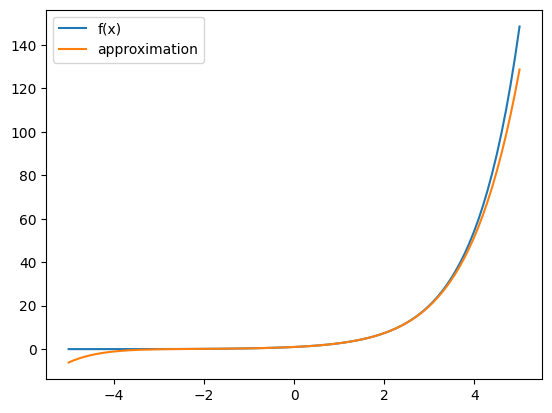

In [5]:
import autograd.numpy as anp
import autograd
func = anp.exp
#func = anp.sin #from -4,4 perhaps?

degree = 7
a,b = -5,5

my_approx_f = lambda x: fake_taylor_expansion(x, 0, func, n=degree)

visualize(f=func, f_approx=my_approx_f, a=a, b=b, points_num=100)